In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('data.txt', delim_whitespace=True)

In [3]:
data.head

<bound method NDFrame.head of                X0           Y0  helicalID  \
0     3854.031754  1139.546711          1   
1     3885.760199  1086.177398          1   
2     3916.488643  1033.808085          1   
3     3947.217088   980.438773          1   
4     3978.945532   926.069460          1   
...           ...          ...        ...   
3042  4082.839788   632.340972          6   
3043  4004.629539   536.994137          6   
3044  4004.419290   536.647303          6   
3045  3926.209041   440.300469          6   
3046  3927.998792   441.953635          6   

                                         MicrographName    ShiftX    ShiftY  \
0     MotionCorr/job008/Movies/hole4/k40r_cflat_0001... -0.685910  0.140838   
1     MotionCorr/job008/Movies/hole4/k40r_cflat_0001... -0.859160  0.314088   
2     MotionCorr/job008/Movies/hole4/k40r_cflat_0001... -0.859160  0.487338   
3     MotionCorr/job008/Movies/hole4/k40r_cflat_0001... -0.859160  0.621088   
4     MotionCorr/job008/Movies/hol

In [4]:
row_size = data.shape[0]

In [15]:
list(data.groupby("MicrographName"))

[('MotionCorr/job008/Movies/hole4/k40r_cflat_00012_4-1.mrc',
               X0           Y0  helicalID  \
  0   3854.031754  1139.546711          1   
  1   3885.760199  1086.177398          1   
  2   3916.488643  1033.808085          1   
  3   3947.217088   980.438773          1   
  4   3978.945532   926.069460          1   
  5   4039.673977   819.700147          1   
  6   4039.402421   819.330834          1   
  7   4100.130866   712.961522          1   
  8   4100.859310   712.592209          1   
  9   4160.587754   604.222896          1   
  10  4160.316199   604.853583          1   
  11  4190.044643   550.484271          1   
  12  4219.773088   496.114958          1   
  13  4249.501532   442.745645          1   
  14  2420.197692  3739.578512          2   
  15  2420.488910  3739.532691          2   
  16  2448.780128  3683.486871          2   
  17  2503.071346  3571.441051          2   
  18  2531.362564  3515.395230          2   
  19  2559.653783  3459.349410         

In [6]:
#subsetting the dataframe by micrograph name
i = 0
micrographs = []
df1 = None
name = data.loc[0]["MicrographName"]
oldIndex = 0
newIndex = 0
while (i < data.shape[0]):
    if (data.loc[i]["MicrographName"] != name):
        micrographs.append(data.iloc[oldIndex:i,:])
        oldIndex = i
        name = data.loc[i]["MicrographName"]
    i = i+1

In [12]:
micrographs[0]

[(3854.031754, 1139.546711),
 (3885.7601990000003, 1086.177398),
 (3916.488643, 1033.808085),
 (3947.2170880000003, 980.4387730000001),
 (3978.945532, 926.0694599999999),
 (4039.6739770000004, 819.700147),
 (4039.4024210000002, 819.330834),
 (4100.1308659999995, 712.961522),
 (4100.85931, 712.592209),
 (4160.587754, 604.222896),
 (4160.316199, 604.853583),
 (4190.044643, 550.484271),
 (4219.773088, 496.114958),
 (4249.501532, 442.745645),
 (2420.197692, 3739.5785119999996),
 (2420.48891, 3739.5326909999994),
 (2448.7801280000003, 3683.486871),
 (2503.071346, 3571.441051),
 (2531.362564, 3515.3952299999996),
 (2559.6537829999997, 3459.3494100000003),
 (2588.945001, 3404.303589),
 (2001.98669, 3708.713542),
 (2029.9998870000002, 3653.8933549999997),
 (2029.013084, 3653.073168),
 (2029.026281, 3653.252981),
 (2057.039479, 3597.432795),
 (2085.0526760000002, 3541.612608),
 (2113.065873, 3485.792421),
 (2141.07907, 3430.9722340000003),
 (2196.092267, 3319.152048),
 (2225.1054649999996, 3263

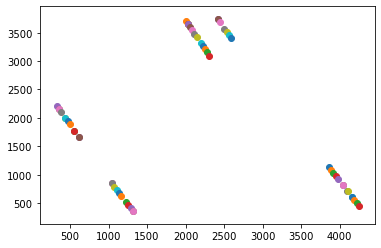

In [7]:
#select micrograph 1 as example, plotting it using matplotlib
for (x,y) in list(zip(micrographs[0].X0, micrographs[0].Y0)):
    plt.scatter(x,y)

In [8]:
def psi_extrapolate(x,y, psi, inter_dist, direction):
    dx = math.cos(psi)*inter_dist
    dy = math.sin(psi)*inter_dist
    if (direction):
        #positive direction
        new_point = (x+dx, y+dy)
    else:
        new_point = (x-dx, y-dy)
    return new_point

def L2_dist(x,y, x1, y1):
    return math.sqrt(math.pow((x-x1),2)+math.pow((y-y1),2))

In [9]:
psi_extrapolate(1,1, math.radians(30), 82.5, True)
L2_dist(1,1,2,2)

1.4142135623730951

In [10]:
micrographs[0].to_numpy().shape

(57, 9)

In [11]:
np.asarray([3885.7601990000003, 1086.177398, 1,
       'MotionCorr/job008/Movies/hole4/k40r_cflat_00012_4-1.mrc',
       -0.85916, 0.31408800000000003, -24.273039999999998, 92.57078,
       60.160669999999996], dtype=object)

array([3885.7601990000003, 1086.177398, 1,
       'MotionCorr/job008/Movies/hole4/k40r_cflat_00012_4-1.mrc',
       -0.85916, 0.31408800000000003, -24.273039999999998, 92.57078,
       60.160669999999996], dtype=object)

In [31]:
#fitting algorithm

#convert micrograph to matrix
data_matrix = micrographs[0].to_numpy()
import random
#picking a random point
index = random.randrange(0,data_matrix.shape[0])

rand_point = data_matrix[index]
data_matrix = np.delete(data_matrix, index, axis=0)

print(rand_point)

final_points = [(rand_point[0], rand_point[1])]
while (True):
    theoretical_next = psi_extrapolate(rand_point[0],rand_point[1], -1*math.radians(rand_point[8]), 82.5, True)
    #check the nearest points in data_matrix to these two points, if none are there, plot a temporary point and include it in the final points
    if (theoretical_next[0] > 5000 or theoretical_next[1] > 4000):
        break
    i = 0
    point_found = False
    for point1, point2 in zip(data_matrix[:,0], data_matrix[:,1]):
        if L2_dist(theoretical_next[0],theoretical_next[1], point1, point2) < 10:
            final_points.append((point1, point2))
            print(data_matrix[i])
            rand_point = data_matrix[i]
            data_matrix = np.delete(data_matrix, i, 0)
            point_found = True
            print("found")
            break   
        i = i +1
    if (point_found == False):
            final_points.append(theoretical_next)

            rand_point = np.copy(rand_point)

            rand_point[0] = theoretical_next[0]
            rand_point[1] = theoretical_next[1]
            
            

[2531.362564 3515.3952299999996 2
 'MotionCorr/job008/Movies/hole4/k40r_cflat_00012_4-1.mrc' -0.51266
 0.621088 -22.33834 88.243125 63.560253]


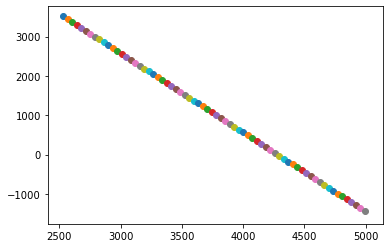

In [32]:
#select micrograph 1 as example, plotting it using matplotlib
for (x,y) in final_points:
    plt.scatter(x,y)
